# Data Modeling

## Data Modeling

### Importing libraries and load the datasets

In [1]:
# Importing libraries
import datetime
from datetime import datetime
import pandas as pd
import numpy as np
from openpyxl import Workbook
import matplotlib.pyplot as plt 
import seaborn as sns

from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt, ceil

import pickle

In [2]:
# Load all the datasets
df = pd.read_excel(r"..\..\data\dataModeling\dataModeling_DimsumTJOEAN.xlsx")

In [3]:
df.head(10)

,DATE,Month,Shumai 10 Pcs,Shumai 20 Pcs,Shumai 30 Pcs,Chicken Lumpia 10 Pcs
0,2021-01-01,1,35,32,92,0
1,2021-02-01,2,30,35,101,59
2,2021-03-01,3,25,15,57,93
3,2021-04-01,4,19,28,88,96
4,2021-05-01,5,17,16,49,115
5,2021-06-01,6,9,6,32,41
6,2021-07-01,7,8,18,50,48
7,2021-08-01,8,94,50,54,124
8,2021-09-01,9,41,25,50,85
9,2021-10-01,10,19,16,19,26


In [4]:
df.tail(10)

,DATE,Month,Shumai 10 Pcs,Shumai 20 Pcs,Shumai 30 Pcs,Chicken Lumpia 10 Pcs
22,2022-11-01,23,7,5,20,9
23,2022-12-01,24,19,17,28,33
24,2023-01-01,25,14,9,18,9
25,2023-02-01,26,3,3,29,18
26,2023-03-01,27,2,8,46,11
27,2023-04-01,28,19,74,55,70
28,2023-05-01,29,0,5,22,4
29,2023-07-01,30,1,1,7,1
30,2023-08-01,31,1,4,7,5
31,2023-09-01,32,1,0,1,0


In [5]:
# df = df.iloc[:29, :]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   32 non-null     datetime64[ns]
 1   Month                  32 non-null     int64         
 2   Shumai 10 Pcs          32 non-null     int64         
 3   Shumai 20 Pcs          32 non-null     int64         
 4   Shumai 30 Pcs          32 non-null     int64         
 5   Chicken Lumpia 10 Pcs  32 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.6 KB


### Exploratory Data Analysis

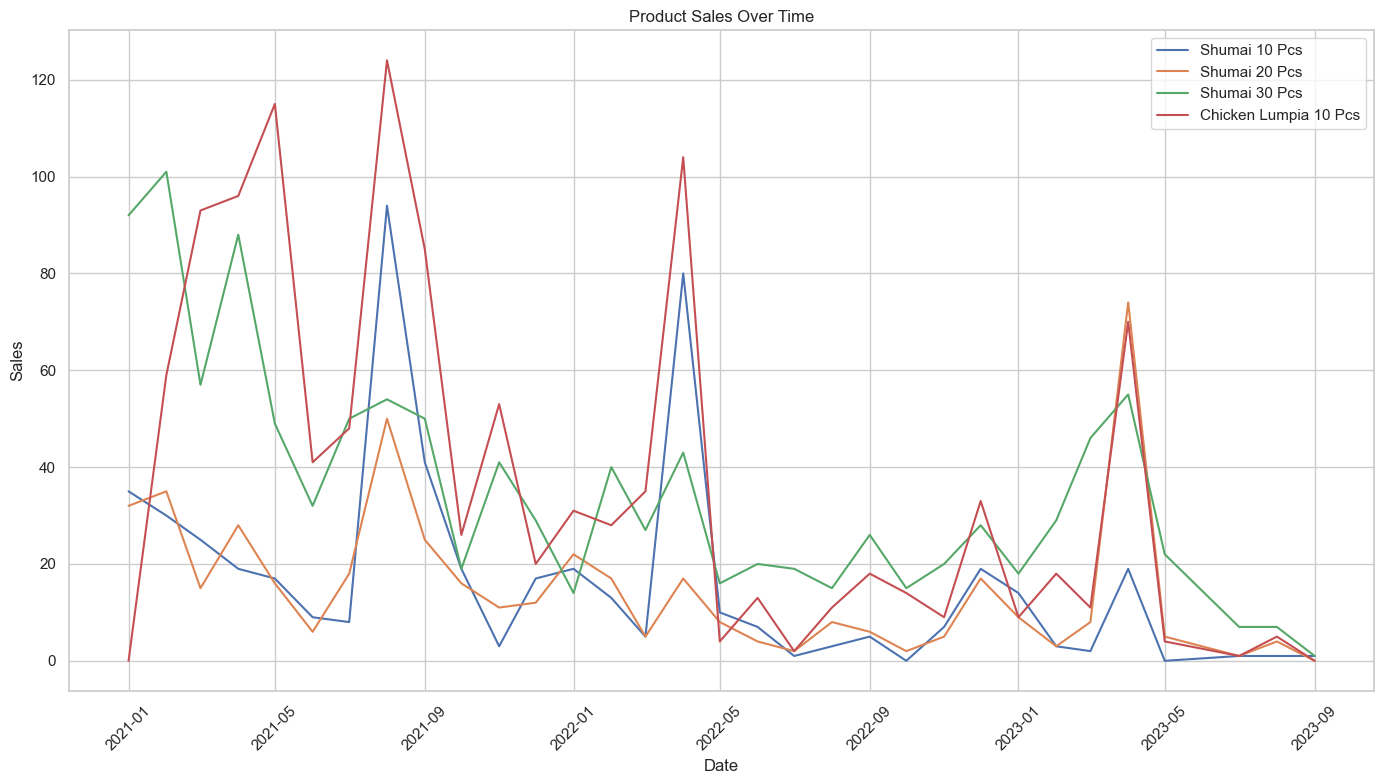

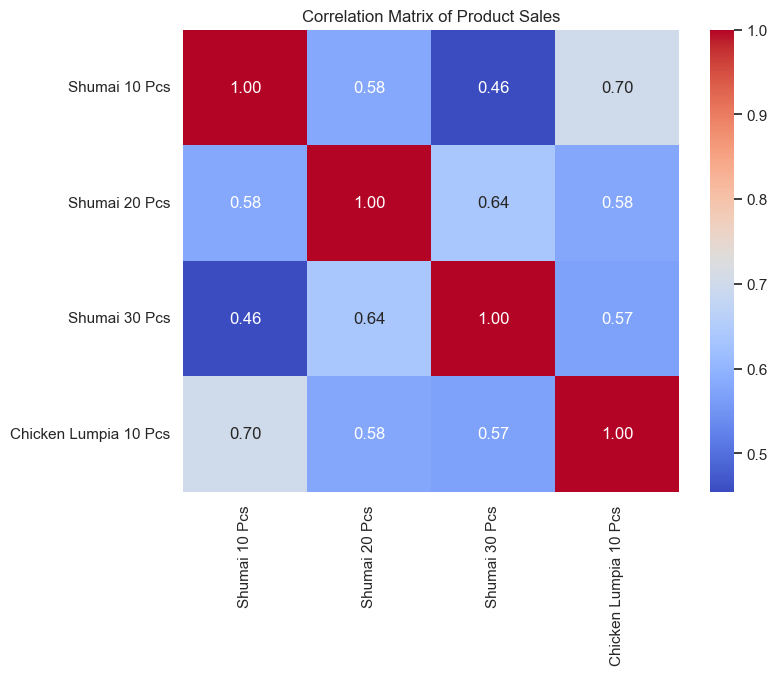

In [7]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting sales data for each product over time
plt.figure(figsize=(14, 8))

# Plot each product's sales
for column in df.columns[2:]:
    sns.lineplot(data=df, x='DATE', y=column, label=column)

plt.title('Product Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Correlation analysis
corr_matrix = df.iloc[:, 2:].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Product Sales')
plt.show()


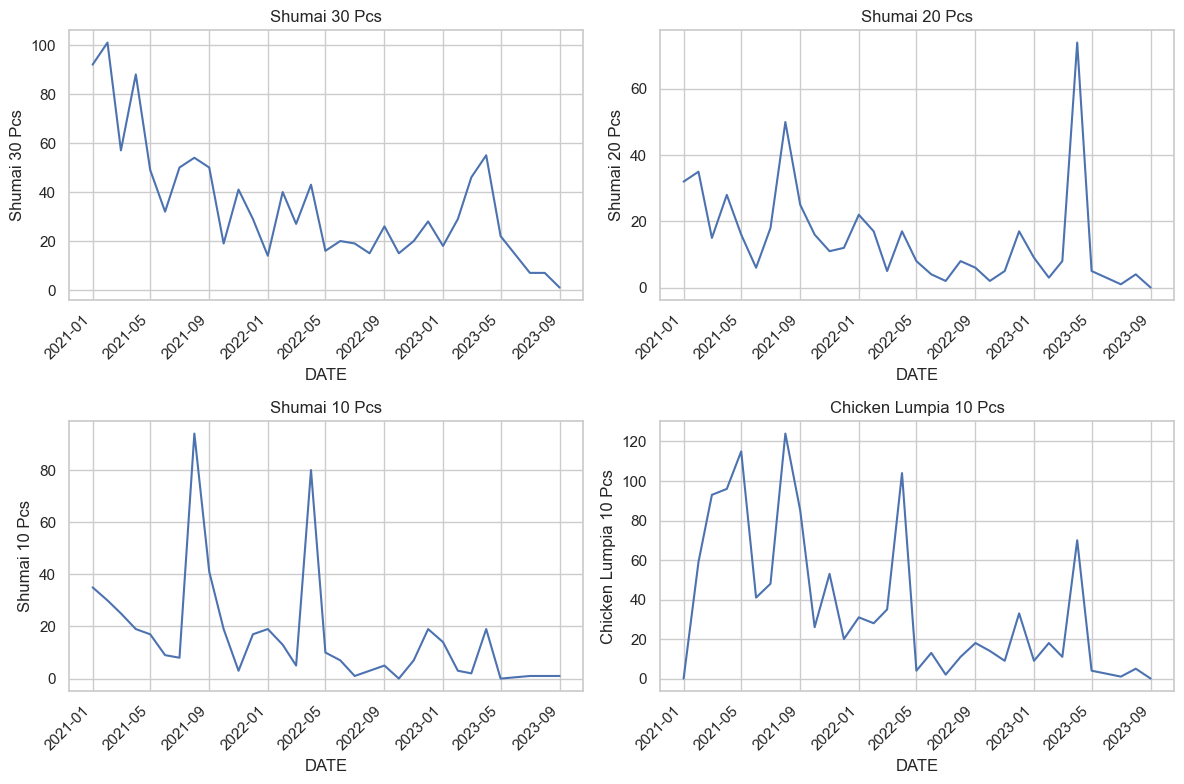

In [8]:
# Buat figure dan subplot menggunakan loop
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Daftar kolom untuk plot
columns_to_plot = ['Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs']

# Loop untuk membuat subplot
for i, column in enumerate(columns_to_plot):
    row_index = i // 2
    col_index = i % 2
    g = sns.lineplot(data=df, x='DATE', y=column, ax=axes[row_index, col_index], palette='mako')
    g.set_xticks(ticks = g.get_xticks(), labels = g.get_xticklabels(), rotation = 45, ha = 'right')
    axes[row_index, col_index].set_title(column)

plt.tight_layout()
plt.show()


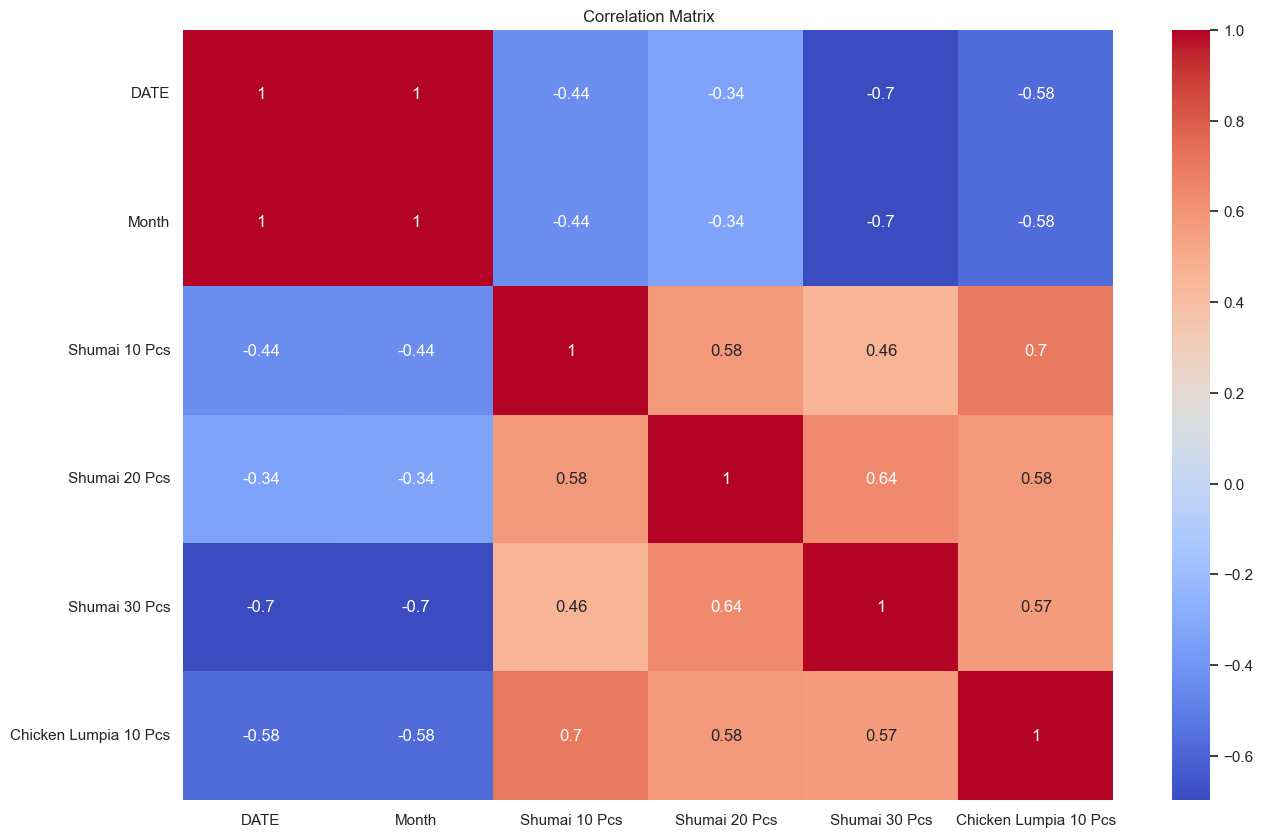

In [9]:
corr = df.corr()
plt.figure(figsize=(15,10), dpi=100)
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title('Correlation Matrix')
plt.show()

In [10]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   32 non-null     datetime64[ns]
 1   Month                  32 non-null     int64         
 2   Shumai 10 Pcs          32 non-null     int64         
 3   Shumai 20 Pcs          32 non-null     int64         
 4   Shumai 30 Pcs          32 non-null     int64         
 5   Chicken Lumpia 10 Pcs  32 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.6 KB


### Choose the best algorithm (optional)

In [11]:
# LazyRegressor
# X = df.drop(columns=['Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs'], axis=1)
# Y = df[['Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs']]
# X = df[['YEAR', 'MONTH']]
# y = df.iloc[:, 1:5]
# X = df.iloc[:, [0]]
# y = df.iloc[:, 1:]
# X = df.iloc[:, 1:3]
# y = df.iloc[:, 3:]
X = df.iloc[:, [1]]
y = df.iloc[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

  5%|▍         | 2/42 [00:00<00:02, 17.77it/s]

AdaBoostRegressor model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.
BayesianRidge model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.


 12%|█▏        | 5/42 [00:00<00:01, 23.78it/s]

 19%|█▉        | 8/42 [00:00<00:01, 26.30it/s]

ElasticNetCV model failed to execute
For multi-task outputs, use MultiTaskElasticNetCV


 38%|███▊      | 16/42 [00:00<00:01, 18.58it/s]

GammaRegressor model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.
GradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.
HistGradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.
HuberRegressor model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.
LarsCV model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.


 57%|█████▋    | 24/42 [00:01<00:00, 26.10it/s]

LassoCV model failed to execute
For multi-task outputs, use MultiTaskLassoCV
LassoLarsCV model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.
LassoLarsIC model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.
LinearSVR model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.


 67%|██████▋   | 28/42 [00:01<00:00, 21.56it/s]

NuSVR model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.
OrthogonalMatchingPursuit model failed to execute
shapes (1,) and (4,) not aligned: 1 (dim 0) != 4 (dim 0)
OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(25, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.
PassiveAggressiveRegressor model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.
PoissonRegressor model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.
QuantileRegressor model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.


 86%|████████▌ | 36/42 [00:02<00:00, 13.16it/s]

SGDRegressor model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.
SVR model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.
TweedieRegressor model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.


100%|██████████| 42/42 [00:03<00:00, 10.98it/s]

LGBMRegressor model failed to execute
y should be a 1d array, got an array of shape (25, 4) instead.


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
TransformedTargetRegressor,0.13,0.28,21.51,0.03
Lars,0.13,0.28,21.51,0.04
LinearRegression,0.13,0.28,21.51,0.03
Ridge,0.12,0.27,21.56,0.03
RidgeCV,0.12,0.27,21.56,0.03
Lasso,0.08,0.24,21.63,0.03
LassoLars,0.08,0.24,21.63,0.04
ElasticNet,-0.03,0.14,22.49,0.04
ExtraTreesRegressor,-0.08,0.10,25.13,0.38


### Selecting features and target

In [12]:
# X = df[['YEAR', 'MONTH']]
# y = df.iloc[:, 1:5]
# X = df.iloc[:, [0]]
# y = df.iloc[:, 1:]
# X = df.iloc[:, 1:3]
# y = df.iloc[:, 3:]
X = df.iloc[:, [1]]
y = df.iloc[:, 2:]
print(X.head())
print(y.head())
print(X.shape)
print(y.shape)

   Month
0      1
1      2
2      3
3      4
4      5
   Shumai 10 Pcs  Shumai 20 Pcs  Shumai 30 Pcs  Chicken Lumpia 10 Pcs
0             35             32             92                      0
1             30             35            101                     59
2             25             15             57                     93
3             19             28             88                     96
4             17             16             49                    115
(32, 1)
(32, 4)


### Modelling the ExtraTreesRegressor

#### Usual

In [13]:
# ExtraTreesRegressor
# X = df.drop(columns=['DATE', 'Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs'], axis=1)
# Y = df[['Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs']]
# X = df.iloc[:, [0]]
# y = df.iloc[:, 1:]
# X = df.iloc[:, 1:3]
# y = df.iloc[:, 3:]
X = df.iloc[:, [1]]
y = df.iloc[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)
reg = ExtraTreesRegressor(n_estimators=2000, random_state=42, verbose=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')
print()
print(f'Type of X_test: {type(X_test)}')
print(f'Type of y_pred: {type(y_pred)}')
print(f'Score X_train & y_train: {reg.score(X_train, y_train)}')
print(f'Score X_test & y_test: {reg.score(X_test, y_test)}')
print(f'Predictive value: {y_pred}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

Shape of X_train: (25, 1)
Shape of X_test: (7, 1)
Shape of y_train: (25, 4)
Shape of y_test: (7, 4)

Type of X_test: <class 'pandas.core.frame.DataFrame'>
Type of y_pred: <class 'numpy.ndarray'>
Score X_train & y_train: 1.0
Score X_test & y_test: 0.18635450796627118
Predictive value: [[ 22.019   18.007   45.5045  69.016 ]
 [  8.048    8.504   31.888    9.992 ]
 [  0.4745   4.5255  14.8825   4.4745]
 [ 29.935   23.3895  74.2725  47.1045]
 [  7.465    6.479   21.577   19.717 ]
 [ 21.076   15.4905  53.076  103.791 ]
 [ 24.6815  21.5385  50.      66.7035]]
MAE: 20.244285714285713
MSE: 966.4858331071429
RMSE: 31.088355265390653


In [14]:
prediction = reg.predict([[31]])
prediction

array([[1., 4., 7., 5.]])

#### Initial

In [15]:
def regression_model(month):
    regressors = [
        ["ETR 1", ExtraTreesRegressor()],
        ["ETR 2", ExtraTreesRegressor(random_state=0, verbose=0)],
        ["ETR 3", ExtraTreesRegressor(random_state=42, verbose=0)],
        ["ETR 4", ExtraTreesRegressor(random_state=64, verbose=0)],
        ]

    data_for_pred = df[["Month", "Shumai 10 Pcs", "Shumai 20 Pcs", "Shumai 30 Pcs", "Chicken Lumpia 10 Pcs"]]
    variables = data_for_pred.iloc[:, [0]]
    results = data_for_pred.iloc[:, 1:]

    predictionData = np.array([[month]])

    info = ""

    for item in regressors:
        regression = item[1]

        variables_train, variables_test, result_train, result_test = train_test_split(variables, results, 
                                                                                      test_size=0.2, random_state=64)
        
        regression.fit(variables_train, result_train)

        # Prediction for the test data
        prediction_test = regression.predict(variables_test)

        # Calculate metrics
        r2 = r2_score(result_test, prediction_test, multioutput='variance_weighted')
        mae = mean_absolute_error(result_test, prediction_test, multioutput='raw_values')
        mse = mean_squared_error(result_test, prediction_test, multioutput='raw_values')
        rmse = np.sqrt(mse)
        
        info += (f"{item[0]} R^2: {r2:.2f} | MAE: {mae.mean():.2f} | MSE: {mse.mean():.2f} | RMSE: {rmse.mean():.2f}\n")

    return info

# Run the modified regression model function for a specific month (example: 36)
regression_info = regression_model(30)
regression_info

'ETR 1 R^2: 0.11 | MAE: 20.47 | MSE: 990.99 | RMSE: 29.03\nETR 2 R^2: 0.14 | MAE: 20.21 | MSE: 959.93 | RMSE: 28.60\nETR 3 R^2: 0.13 | MAE: 20.12 | MSE: 968.86 | RMSE: 28.84\nETR 4 R^2: 0.13 | MAE: 20.31 | MSE: 968.79 | RMSE: 28.78\n'

#### Iterate the Regressor and the Test Size

In [16]:
# Simplified and optimized version of the function with reduced number of models and estimators for demonstration
def optimized_regression_model(month):
    regressors = [
        ["ETR 1", ExtraTreesRegressor()],
        ["ETR 2", ExtraTreesRegressor(random_state=0, verbose=0)],
        ["ETR 3", ExtraTreesRegressor(random_state=42, verbose=0)],
        ["ETR 4", ExtraTreesRegressor(random_state=64, verbose=0)],
        ]

    test_sizes = [0.2, 0.3, 0.4]
    results_list = []

    for test_size in test_sizes:
        for item in regressors:
            regression = item[1]
            data_for_pred = df[["Month", "Shumai 10 Pcs", "Shumai 20 Pcs", "Shumai 30 Pcs", "Chicken Lumpia 10 Pcs"]]
            X = data_for_pred.iloc[:, [0]]
            y = data_for_pred.iloc[:, 1:]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=64)
            
            regression.fit(X_train, y_train)
            y_pred_test = regression.predict(X_test)
            
            # Calculate metrics
            r2 = r2_score(y_test, y_pred_test, multioutput='variance_weighted')
            mae = mean_absolute_error(y_test, y_pred_test, multioutput='raw_values').mean()
            mse = mean_squared_error(y_test, y_pred_test, multioutput='raw_values').mean()
            rmse = np.sqrt(mse)

            # Predicting sales for the given month
            prediction = regression.predict(np.array([[month]]))

            results_list.append({
                'Regressor': item[0],
                'Test Size': test_size,
                'R^2': r2,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'Shumai 10 Pcs': ceil(prediction[0][0]),
                'Shumai 20 Pcs': ceil(prediction[0][1]),
                'Shumai 30 Pcs': ceil(prediction[0][2]),
                'Chicken Lumpia 10 Pcs': ceil(prediction[0][3])
            })

    return pd.DataFrame(results_list).style.background_gradient(cmap = 'Blues')

# Run the optimized function
optimized_results_df = optimized_regression_model(30)
optimized_results_df

,Regressor,Test Size,R^2,MAE,MSE,RMSE,Shumai 10 Pcs,Shumai 20 Pcs,Shumai 30 Pcs,Chicken Lumpia 10 Pcs
0,ETR 1,0.200000,0.115705,20.501071,983.552346,31.361638,1,5,15,5
1,ETR 2,0.200000,0.136946,20.206786,959.927239,30.982693,1,5,15,5
2,ETR 3,0.200000,0.128912,20.122500,968.862918,31.126563,1,5,15,5
3,ETR 4,0.200000,0.128976,20.305714,968.791500,31.125416,1,5,15,5
4,ETR 1,0.300000,0.131556,17.697250,777.294522,27.880002,1,5,13,5
5,ETR 2,0.300000,0.143430,17.377000,766.666155,27.688737,1,5,14,5
6,ETR 3,0.300000,0.158897,17.242250,752.823043,27.437621,1,5,15,5
7,ETR 4,0.300000,0.116878,17.868500,790.432020,28.114623,1,5,15,5
8,ETR 1,0.400000,-0.060028,19.357885,867.990563,29.461680,1,5,15,5
9,ETR 2,0.400000,-0.060639,19.217115,868.490713,29.470166,1,5,14,5


#### Removing outlier and Iterate the Regressor and Test Size

In [17]:
# Mengidentifikasi dan menghapus outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index(drop=True).sort_values(by=['Month'])

df_filtered.info();
df_filtered.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   28 non-null     datetime64[ns]
 1   Month                  28 non-null     int64         
 2   Shumai 10 Pcs          28 non-null     int64         
 3   Shumai 20 Pcs          28 non-null     int64         
 4   Shumai 30 Pcs          28 non-null     int64         
 5   Chicken Lumpia 10 Pcs  28 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.4 KB


,DATE,Month,Shumai 10 Pcs,Shumai 20 Pcs,Shumai 30 Pcs,Chicken Lumpia 10 Pcs
23,2023-03-01,27,2,8,46,11
24,2023-05-01,29,0,5,22,4
25,2023-07-01,30,1,1,7,1
26,2023-08-01,31,1,4,7,5
27,2023-09-01,32,1,0,1,0


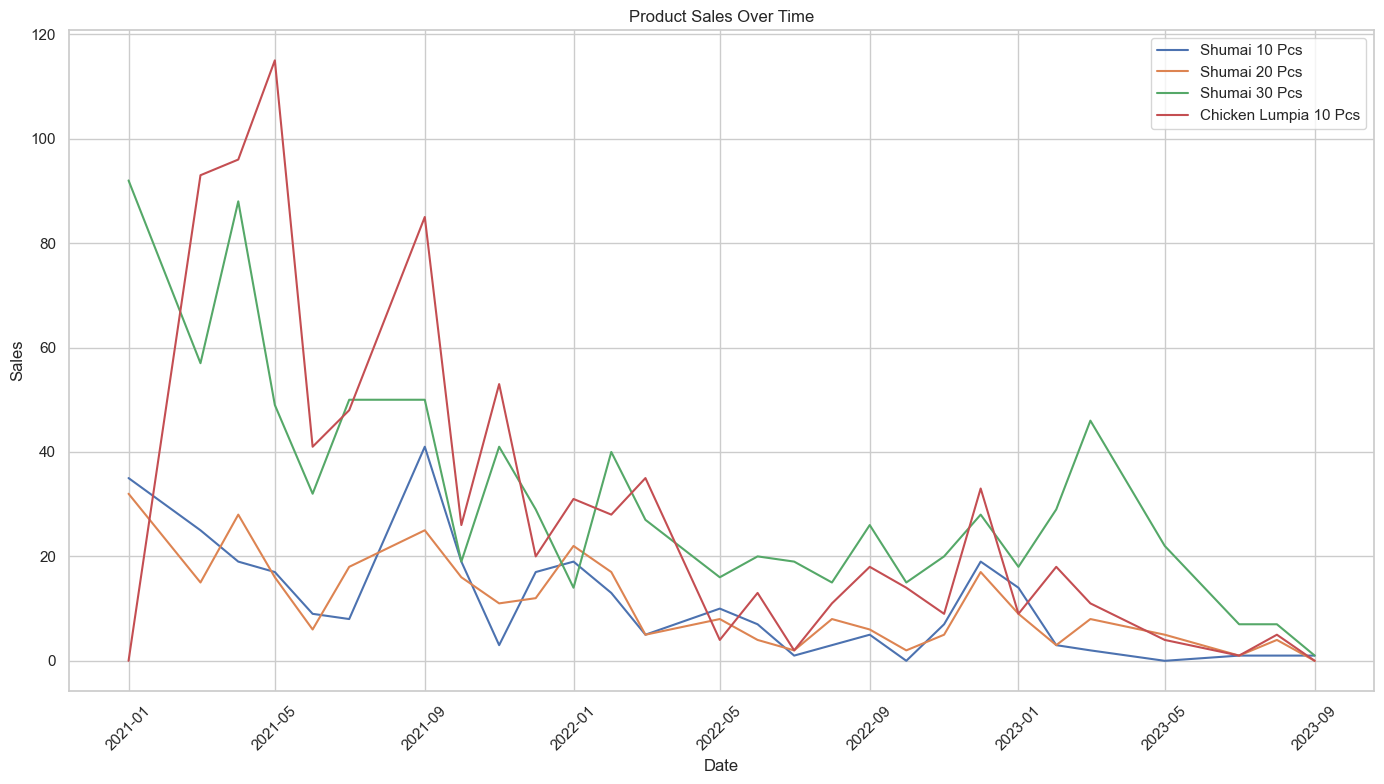

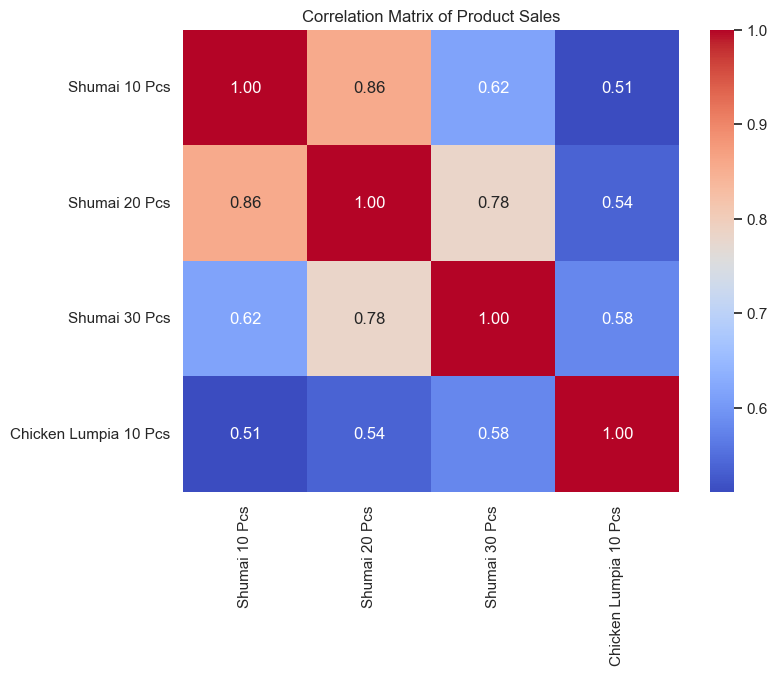

In [18]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting sales data for each product over time
plt.figure(figsize=(14, 8))

# Plot each product's sales
for column in df_filtered.columns[2:]:
    sns.lineplot(data=df_filtered, x='DATE', y=column, label=column)

plt.title('Product Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Correlation analysis
corr_matrix = df_filtered.iloc[:, 2:].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Product Sales')
plt.show()

In [19]:
# Simplified and optimized version of the function with reduced number of models and estimators for demonstration
def optimized_regression_model(month):
    regressors = [
        ["ETR 1", ExtraTreesRegressor()],
        ["ETR 2", ExtraTreesRegressor(random_state=0, verbose=0)],
        ["ETR 3", ExtraTreesRegressor(random_state=42, verbose=0)],
        ["ETR 4", ExtraTreesRegressor(random_state=64, verbose=0)],
    ]

    test_sizes = [0.2, 0.3, 0.4]
    results_list = []

    for test_size in test_sizes:
        for item in regressors:
            regression = item[1]
            data_for_pred = df_filtered[["Month", "Shumai 10 Pcs", "Shumai 20 Pcs", "Shumai 30 Pcs", "Chicken Lumpia 10 Pcs"]]
            X = data_for_pred.iloc[:, [0]]
            y = data_for_pred.iloc[:, 1:]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=64)
            
            regression.fit(X_train, y_train)
            y_pred_test = regression.predict(X_test)
            
            # Calculate metrics
            r2 = r2_score(y_test, y_pred_test, multioutput='variance_weighted')
            mae = mean_absolute_error(y_test, y_pred_test, multioutput='raw_values').mean()
            mse = mean_squared_error(y_test, y_pred_test, multioutput='raw_values').mean()
            rmse = np.sqrt(mse)

            # Predicting sales for the given month
            prediction = regression.predict(np.array([[month]]))

            results_list.append({
                'Regressor': item[0],
                'Test Size': test_size,
                'R^2': r2,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'Shumai 10 Pcs': ceil(prediction[0][0]),
                'Shumai 20 Pcs': ceil(prediction[0][1]),
                'Shumai 30 Pcs': ceil(prediction[0][2]),
                'Chicken Lumpia 10 Pcs': ceil(prediction[0][3])
            })

    return pd.DataFrame(results_list).style.background_gradient(cmap = 'Blues')

# Run the optimized function
optimized_results_df = optimized_regression_model(30)
optimized_results_df

,Regressor,Test Size,R^2,MAE,MSE,RMSE,Shumai 10 Pcs,Shumai 20 Pcs,Shumai 30 Pcs,Chicken Lumpia 10 Pcs
0,ETR 1,0.200000,0.647376,8.094583,150.585329,12.271321,1,5,15,5
1,ETR 2,0.200000,0.616947,7.999167,163.579775,12.789831,1,5,14,5
2,ETR 3,0.200000,0.617179,8.014167,163.480417,12.785946,1,5,14,5
3,ETR 4,0.200000,0.625910,8.086250,159.752162,12.639310,1,5,15,5
4,ETR 1,0.300000,0.393315,8.910833,197.112653,14.039681,1,5,15,5
5,ETR 2,0.300000,0.389333,9.115833,198.406525,14.085685,1,5,14,5
6,ETR 3,0.300000,0.367483,9.151389,205.505569,14.335465,1,5,15,5
7,ETR 4,0.300000,0.375773,9.162778,202.812139,14.241213,1,5,16,5
8,ETR 1,0.400000,0.413521,8.475000,171.910529,13.111466,2,5,16,7
9,ETR 2,0.400000,0.434480,8.543333,165.767079,12.875056,2,6,18,7


#### Create a new row based on maximum sales of month

In [20]:
# Identifying the range for new months based on existing data
max_existing_month = df_filtered['Month'].max()
new_month_range = np.arange(max_existing_month + 1, max_existing_month + 6)  # Adding 5 new months

# Generating synthetic sales data for the new months
new_shumai_10_pcs = np.random.normal(df['Shumai 10 Pcs'].mean(), df['Shumai 10 Pcs'].std(), len(new_month_range))
new_shumai_20_pcs = np.random.normal(df['Shumai 20 Pcs'].mean(), df['Shumai 20 Pcs'].std(), len(new_month_range))
new_shumai_30_pcs = np.random.normal(df['Shumai 30 Pcs'].mean(), df['Shumai 30 Pcs'].std(), len(new_month_range))
new_chicken_lumpia_10_pcs = np.random.normal(df['Chicken Lumpia 10 Pcs'].mean(), df['Chicken Lumpia 10 Pcs'].std(), len(new_month_range))

# Creating a DataFrame for the new synthetic data
new_data = pd.DataFrame({
    'Month': new_month_range,
    'Shumai 10 Pcs': new_shumai_10_pcs.clip(min=0),  # Ensure non-negative sales values
    'Shumai 20 Pcs': new_shumai_20_pcs.clip(min=0),
    'Shumai 30 Pcs': new_shumai_30_pcs.clip(min=0),
    'Chicken Lumpia 10 Pcs': new_chicken_lumpia_10_pcs.clip(min=0)
})

# Append the new synthetic data to the original DataFrame
df_updated = pd.concat([df_filtered, new_data]).reset_index(drop=True)

df_updated.info();
df_updated.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   28 non-null     datetime64[ns]
 1   Month                  33 non-null     int64         
 2   Shumai 10 Pcs          33 non-null     float64       
 3   Shumai 20 Pcs          33 non-null     float64       
 4   Shumai 30 Pcs          33 non-null     float64       
 5   Chicken Lumpia 10 Pcs  33 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 1.7 KB


,DATE,Month,Shumai 10 Pcs,Shumai 20 Pcs,Shumai 30 Pcs,Chicken Lumpia 10 Pcs
28,NaT,33,0.00,7.42,21.27,29.48
29,NaT,34,59.77,11.14,11.59,33.42
30,NaT,35,22.96,14.85,13.99,15.92
31,NaT,36,26.85,28.97,54.56,30.68
32,NaT,37,8.36,0.00,45.65,59.69


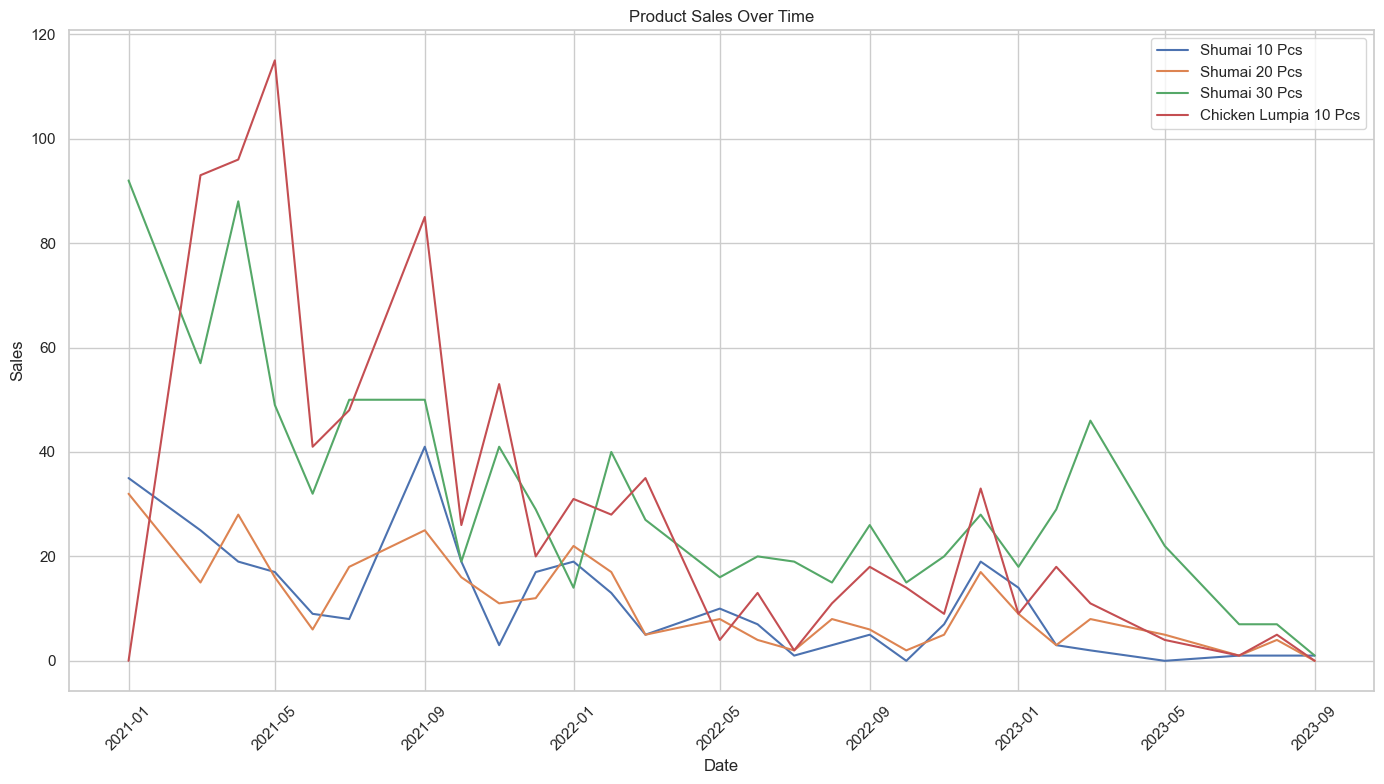

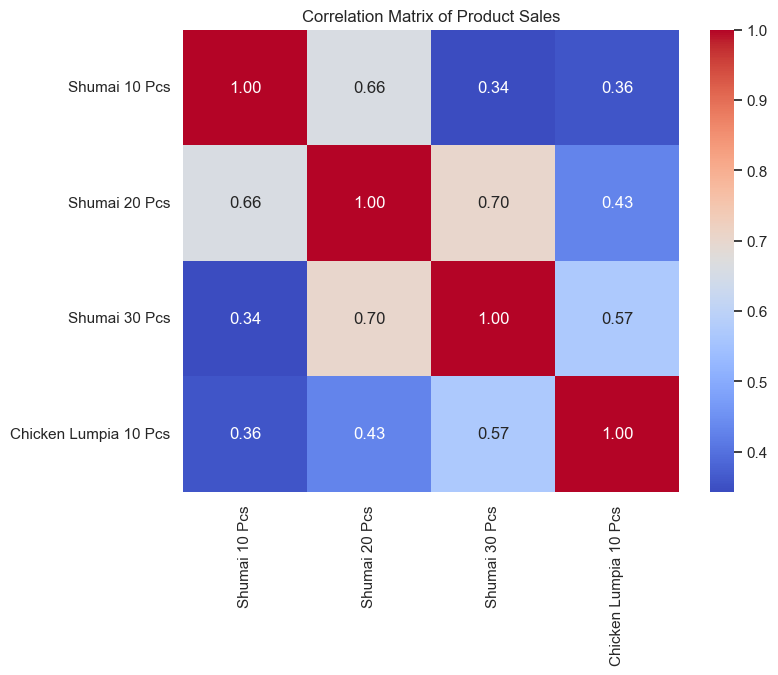

In [21]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting sales data for each product over time
plt.figure(figsize=(14, 8))

# Plot each product's sales
for column in df_updated.columns[2:]:
    sns.lineplot(data=df_updated, x='DATE', y=column, label=column)

plt.title('Product Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Correlation analysis
corr_matrix = df_updated.iloc[:, 2:].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Product Sales')
plt.show()

In [22]:
# Simplified and optimized version of the function with reduced number of models and estimators for demonstration
def optimized_regression_model(month):
    regressors = [
        ["ETR 1", ExtraTreesRegressor()],
        ["ETR 2", ExtraTreesRegressor(random_state=0, verbose=0)],
        ["ETR 3", ExtraTreesRegressor(random_state=42, verbose=0)],
        ["ETR 4", ExtraTreesRegressor(random_state=64, verbose=0)],
        ]

    test_sizes = [0.2, 0.3, 0.4]
    results_list = []

    for test_size in test_sizes:
        for item in regressors:
            regression = item[1]
            data_for_pred = df_updated[["Month", "Shumai 10 Pcs", "Shumai 20 Pcs", "Shumai 30 Pcs", "Chicken Lumpia 10 Pcs"]]
            X = data_for_pred.iloc[:, [0]]
            y = data_for_pred.iloc[:, 1:]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=64)
            
            regression.fit(X_train, y_train)
            y_pred_test = regression.predict(X_test)
            
            # Calculate metrics
            r2 = r2_score(y_test, y_pred_test, multioutput='variance_weighted')
            mae = mean_absolute_error(y_test, y_pred_test, multioutput='raw_values').mean()
            mse = mean_squared_error(y_test, y_pred_test, multioutput='raw_values').mean()
            rmse = np.sqrt(mse)

            # Predicting sales for the given month
            prediction = regression.predict(np.array([[month]]))

            results_list.append({
                'Regressor': item[0],
                'Test Size': test_size,
                'R^2': r2,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'Shumai 10 Pcs': prediction[0][0],
                'Shumai 20 Pcs': prediction[0][1],
                'Shumai 30 Pcs': prediction[0][2],
                'Chicken Lumpia 10 Pcs': prediction[0][3]
            })

    return pd.DataFrame(results_list).style.background_gradient(cmap = 'Blues')

# Run the optimized function
optimized_results_df = optimized_regression_model(38)
optimized_results_df

,Regressor,Test Size,R^2,MAE,MSE,RMSE,Shumai 10 Pcs,Shumai 20 Pcs,Shumai 30 Pcs,Chicken Lumpia 10 Pcs
0,ETR 1,0.200000,0.368518,12.029917,331.754314,18.214124,8.360272,0.000000,45.646074,59.693013
1,ETR 2,0.200000,0.361104,12.252445,335.649033,18.320727,8.360272,0.000000,45.646074,59.693013
2,ETR 3,0.200000,0.409728,11.797005,310.104261,17.609777,8.360272,0.000000,45.646074,59.693013
3,ETR 4,0.200000,0.383252,12.149615,324.013452,18.000374,8.360272,0.000000,45.646074,59.693013
4,ETR 1,0.300000,0.383622,10.524673,260.492616,16.139784,8.360272,0.000000,45.646074,59.693013
5,ETR 2,0.300000,0.402716,10.291634,252.422961,15.887824,8.360272,0.000000,45.646074,59.693013
6,ETR 3,0.300000,0.439092,10.376519,237.049755,15.396420,8.360272,0.000000,45.646074,59.693013
7,ETR 4,0.300000,0.429714,10.153653,241.013236,15.524601,8.360272,0.000000,45.646074,59.693013
8,ETR 1,0.400000,0.175153,11.327980,362.992853,19.052371,8.360272,0.000000,45.646074,59.693013
9,ETR 2,0.400000,0.205509,11.171566,349.633991,18.698502,8.360272,0.000000,45.646074,59.693013


### Save Model

#### Model 1 : Iterate

In [29]:
# Iterate (0.3 & 0.2/0.4)
# Selecting features and model once again
X = df.iloc[:, [1]]
y = df.iloc[:, 2:]

# Train Test Split for 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 64)

# Fitted the model based on the best iteration result (0.3)
model_1A = ExtraTreesRegressor()
model_1A.fit(X_train, y_train)

# Saving the best model (0.3)
pickle.dump(model_1A, open(r'..\..\models\model_1A.pkl', 'wb'))

# Importing the saved best model (0.3)
model_1A_import = pickle.load(open(r'..\..\models\model_1A.pkl', 'rb'))

# Train Test Split for 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

# Fitted the model based on the best iteration result (0.2)
model_1B = ExtraTreesRegressor()
model_1B.fit(X_train, y_train)

# Saving the best model (0.2)
pickle.dump(model_1B, open(r'..\..\models\model_1B.pkl', 'wb'))

# Importing the saved best model (0.2)
model_1B_import = pickle.load(open(r'..\..\models\model_1B.pkl', 'rb'))

#### Model 2 : Removing Outlier

In [28]:
# Removing Outlier (0.2 & 0.4)
# Selecting features and model once again
X = df_filtered.iloc[:, [1]]
y = df_filtered.iloc[:, 2:]

# Train Test Split for 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

# Fitted the model based on the best iteration result (0.2)
model_2A = ExtraTreesRegressor()
model_2A.fit(X_train, y_train)

# Saving the best model (0.2)
pickle.dump(model_2A, open(r'..\..\models\model_2A.pkl', 'wb'))

# Importing the saved best model (0.2)
model_2A_import = pickle.load(open(r'..\..\models\model_2A.pkl', 'rb'))

# Train Test Split for 0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 64)

# Fitted the model based on the best iteration result (0.4)
model_2B = ExtraTreesRegressor()
model_2B.fit(X_train, y_train)

# Saving the best model (0.4)
pickle.dump(model_2B, open(r'..\..\models\model_2B.pkl', 'wb'))

# Importing the saved best model (0.4)
model_2B_import = pickle.load(open(r'..\..\models\model_2B.pkl', 'rb'))

#### Model 3 : New Row

In [25]:
# New Row (0.3 & 0.2/0.4)
# Selecting features and model once again
X = df_updated.iloc[:, [1]]
y = df_updated.iloc[:, 2:]

# Train Test Split for 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 64)

# Fitted the model based on the best iteration result (0.3)
model_3A = ExtraTreesRegressor()
model_3A.fit(X_train, y_train)

# Saving the best model (0.3)
pickle.dump(model_3A, open(r'..\..\models\model_3A.pkl', 'wb'))

# Importing the saved best model (0.3)
model_3A_import = pickle.load(open(r'..\..\models\model_3A.pkl', 'rb'))

# Train Test Split for 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

# Fitted the model based on the best iteration result (0.2)
model_3B = ExtraTreesRegressor()
model_3B.fit(X_train, y_train)

# Saving the best model (0.2)
pickle.dump(model_3B, open(r'..\..\models\model_3B.pkl', 'wb'))

# Importing the saved best model (0.2)
model_3B_import = pickle.load(open(r'..\..\models\model_3B.pkl', 'rb'))